<a href="https://colab.research.google.com/github/phuocthok18/AI_HKI_2022_2023/blob/main/Tuan4_fuzzy_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

0.7498051774753125


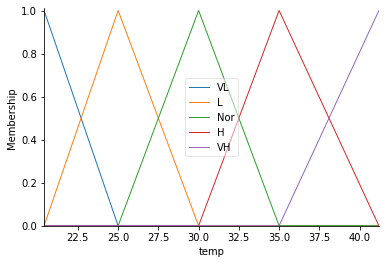

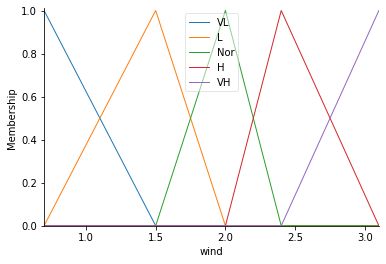

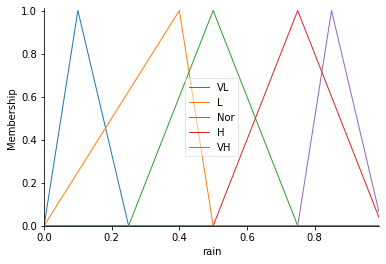

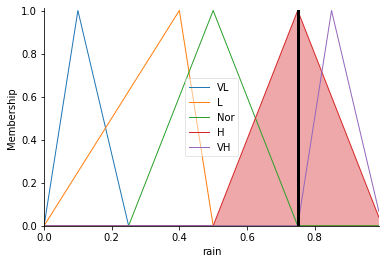

In [ ]:
temp =ctrl.Antecedent(np.arange(20.4,41.3,0.1),'temp')
wind =ctrl.Antecedent(np.arange(0.7,3.2,0.1),'wind')

rain = ctrl.Consequent(np.arange(0,1,0.01),'rain')

wind['VL'] = fuzz.trimf(wind.universe,[0,0.7,1.5])
wind['L'] = fuzz.trimf(wind.universe,[0.7,1.5,2])
wind['Nor'] = fuzz.trimf(wind.universe,[1.5,2,2.4])
wind['H'] = fuzz.trimf(wind.universe,[2,2.4,3.1])
wind['VH'] = fuzz.trimf(wind.universe,[2.4,3.1,4])

temp['VL'] = fuzz.trimf(temp.universe,[0,20.4,25])
temp['L'] = fuzz.trimf(temp.universe,[20.4,25,30])
temp['Nor'] = fuzz.trimf(temp.universe,[25,30,35])
temp['H'] = fuzz.trimf(temp.universe,[30,35,41.2])
temp['VH'] = fuzz.trimf(temp.universe,[35,41.2,50])

rain['VL'] = fuzz.trimf(rain.universe,[0,0.1,0.25])
rain['L'] = fuzz.trimf(rain.universe,[0,0.4,0.5])
rain['Nor'] = fuzz.trimf(rain.universe,[0.25,0.5,0.75])
rain['H'] = fuzz.trimf(rain.universe,[0.5,0.75,1])
rain['VH'] = fuzz.trimf(rain.universe,[0.75,0.85,1])

temp.view()
wind.view()
rain.view()

rule1 =  ctrl.Rule(temp['VL']&wind['VL'],rain['VL'])
rule2 =  ctrl.Rule(temp['VL']&wind['L'],rain['VL'])
rule3 =  ctrl.Rule(temp['VL']&wind['Nor'],rain['L'])
rule4 =  ctrl.Rule(temp['VL']&wind['H'],rain['L'])
rule5 =  ctrl.Rule(temp['VL']&wind['VH'],rain['H'])
rule6 =  ctrl.Rule(temp['L']&wind['VL'],rain['VL'])
rule7 =  ctrl.Rule(temp['L']&wind['L'],rain['VL'])
rule8 =  ctrl.Rule(temp['L']&wind['Nor'],rain['L'])
rule9 =  ctrl.Rule(temp['L']&wind['H'],rain['H'])
rule10 = ctrl.Rule(temp['L']&wind['VH'],rain['H'])
rule11 = ctrl.Rule(temp['Nor']&wind['VL'],rain['L'])
rule12 = ctrl.Rule(temp['Nor']&wind['L'],rain['L'])
rule13 = ctrl.Rule(temp['Nor']&wind['Nor'],rain['L'])
rule14 = ctrl.Rule(temp['Nor']&wind['H'],rain['H'])
rule15 = ctrl.Rule(temp['Nor']&wind['VH'],rain['VH'])
rule16 = ctrl.Rule(temp['H']&wind['VL'],rain['L'])
rule17 = ctrl.Rule(temp['H']&wind['L'],rain['H'])
rule18 = ctrl.Rule(temp['H']&wind['Nor'],rain['H'])
rule19 = ctrl.Rule(temp['H']&wind['H'],rain['VH'])
rule20 = ctrl.Rule(temp['H']&wind['VH'],rain['VH'])
rule21 = ctrl.Rule(temp['VH']&wind['VL'],rain['L'])
rule22 = ctrl.Rule(temp['VH']&wind['L'],rain['H'] )
rule23 = ctrl.Rule(temp['VH']&wind['Nor'],rain['H'])
rule24 = ctrl.Rule(temp['VH']&wind['H'],rain['VH'])
rule25 = ctrl.Rule(temp['VH']&wind['VH'],rain['VH'])

rain_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
raining = ctrl.ControlSystemSimulation(rain_ctrl)
raining.input['temp'] = 30
raining.input['wind'] = 2.4
raining.compute()
print(raining.output['rain'])
rain.view(sim=raining)

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 2.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=62ed7cef6a78a89246f9f57ad428cc6837d68ac618f6591002eeaad9083d0f40
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/data_ai/Salary_Data.csv')
data.head()
# data.shape()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.shape

(30, 2)

In [ ]:
X = data.drop(['Salary'], axis = True)
y = data['Salary']
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


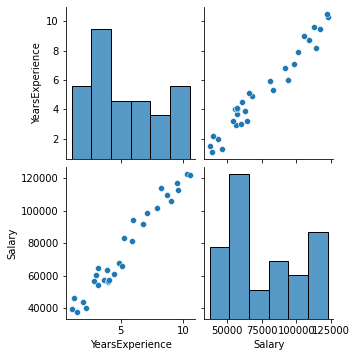

In [ ]:
from sklearn.model_selection import train_test_split 
# chia du lieu train test ngau nhien
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
sns.pairplot(data)

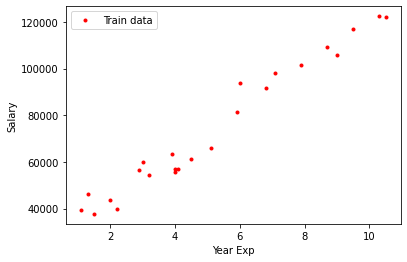

In [ ]:
plt.plot(X_train, y_train, 'r.', label='Train data')
plt.xlabel('Year Exp')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test).round(1)
cal = pd.DataFrame(np.c_[y_test,y_pred], columns=['Original Salary','Predicted Salary'])
print('Conffient', model.coef_)
print('Intercept', model.intercept_)
print('Accuracy', model.score(X_train, y_train))
print('Accuracy_test', model.score(X_test, y_test))

Conffient [9423.81532303]
Intercept 25321.583011776813
Accuracy 0.9645401573418146
Accuracy_test 0.9024461774180497


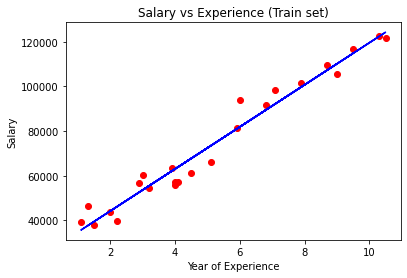

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()